# NVIDIA DALI Demo

Import `fn` and `pipeline_def`

In [1]:
from nvidia.dali import fn
from nvidia.dali import pipeline_def

## Image decoding

In [4]:
image_dir = '/home/awolant/Projects/PyGeekly/data/images'

In [5]:
@pipeline_def
def image_pipeline():
    jpegs, labels = fn.readers.file(file_root=image_dir)
    images = fn.decoders.image(jpegs, device='mixed')

    return images, labels

Create `pipeline` object

In [28]:
pipeline = image_pipeline(batch_size=8, num_threads=1, device_id=0)

print(pipeline)

Build `pipeline`

In [8]:
pipeline.build()

In [9]:
images, labels = pipeline.run()

In [29]:
print(images)

TensorListGPU(
    [[[[255 255 255]
      [255 255 255]
      ...
      [ 85  46  55]
      [ 85  46  55]]

     [[255 255 255]
      [255 255 255]
      ...
      [ 85  46  55]
      [ 85  46  55]]

     ...

     [[158 145 153]
      [159 146 154]
      ...
      [ 92  38  40]
      [ 92  38  40]]

     [[157 145 155]
      [158 146 156]
      ...
      [ 92  38  40]
      [ 92  38  40]]]


    [[[ 69  76  80]
      [ 69  76  80]
      ...
      [ 97 104 108]
      [ 97 104 108]]

     [[ 69  76  80]
      [ 70  77  81]
      ...
      [ 97 104 108]
      [ 97 104 108]]

     ...

     [[199 202 205]
      [199 202 205]
      ...
      [206 209 212]
      [206 209 212]]

     [[199 202 205]
      [199 202 205]
      ...
      [206 209 212]
      [206 209 212]]]


    ...


    [[[ 25  28  25]
      [ 25  28  25]
      ...
      [ 34  39  33]
      [ 34  39  33]]

     [[ 25  28  25]
      [ 25  28  25]
      ...
      [ 34  39  33]
      [ 34  39  33]]

     ...

     [[ 35  45  30]


Show the images

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

%matplotlib inline

def show_images(image_batch):
    columns = 4
    rows = 2
    fig = plt.figure(figsize = (24,(24 // columns) * rows))
    gs = gridspec.GridSpec(rows, columns)
    for j in range(rows*columns):
        plt.subplot(gs[j])
        plt.axis("off")
        plt.imshow(image_batch[j])

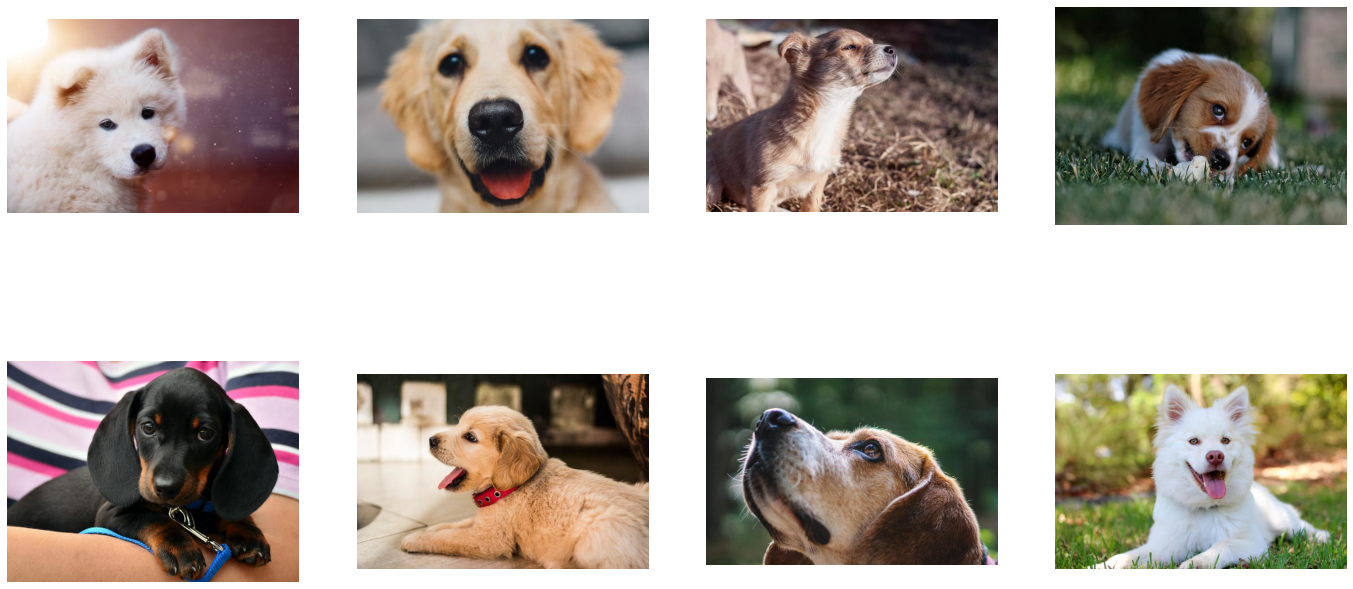

In [12]:
show_images(images.as_cpu())

## Video decoding

In [13]:
import os

video_dir = '/home/awolant/Projects/PyGeekly/data/video'
video_files = [video_dir + '/' + f for f in os.listdir(video_dir)]

In [14]:
@pipeline_def
def video_pipeline():
    videos = fn.readers.video(filenames=video_files, sequence_length=8, device='gpu', stride=2, step=1)
    return videos

In [31]:
pipeline = video_pipeline(batch_size=2, num_threads=1, device_id=0)

In [32]:
pipeline.build()

[/opt/dali/dali/operators/reader/loader/video_loader.h:178] ``file_list_include_preceding_frame`` is set to False (or not set at all). In future releases, the default behavior would be changed to True.


In [33]:
videos = pipeline.run()

Show first sample

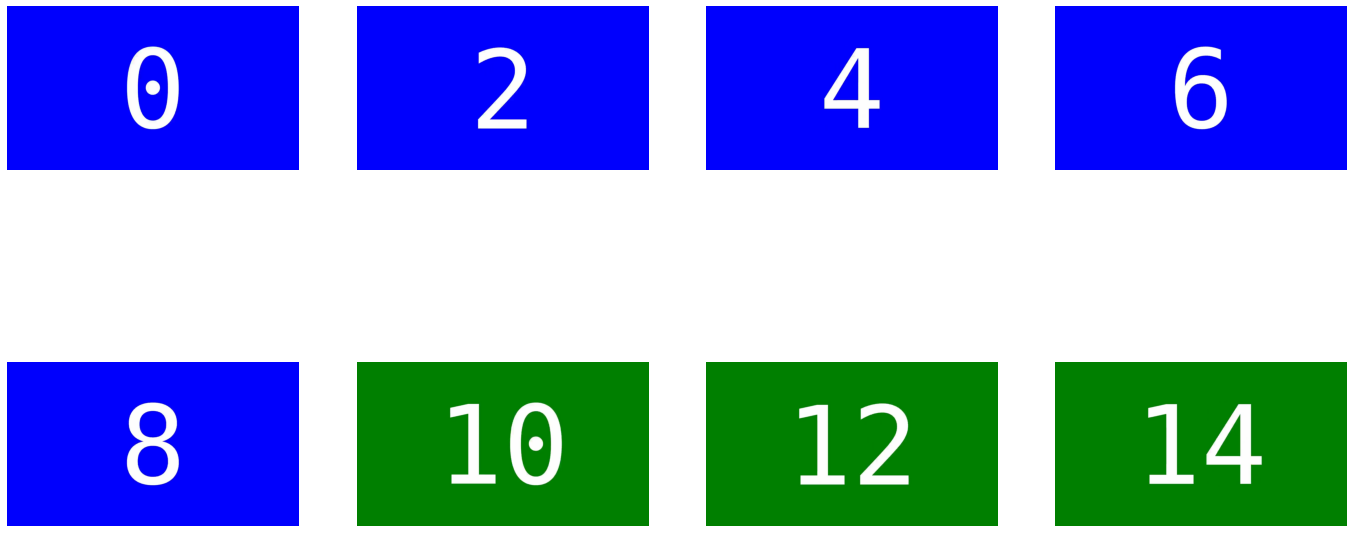

In [34]:
show_images(videos[0].as_cpu().at(0))

Show second sample

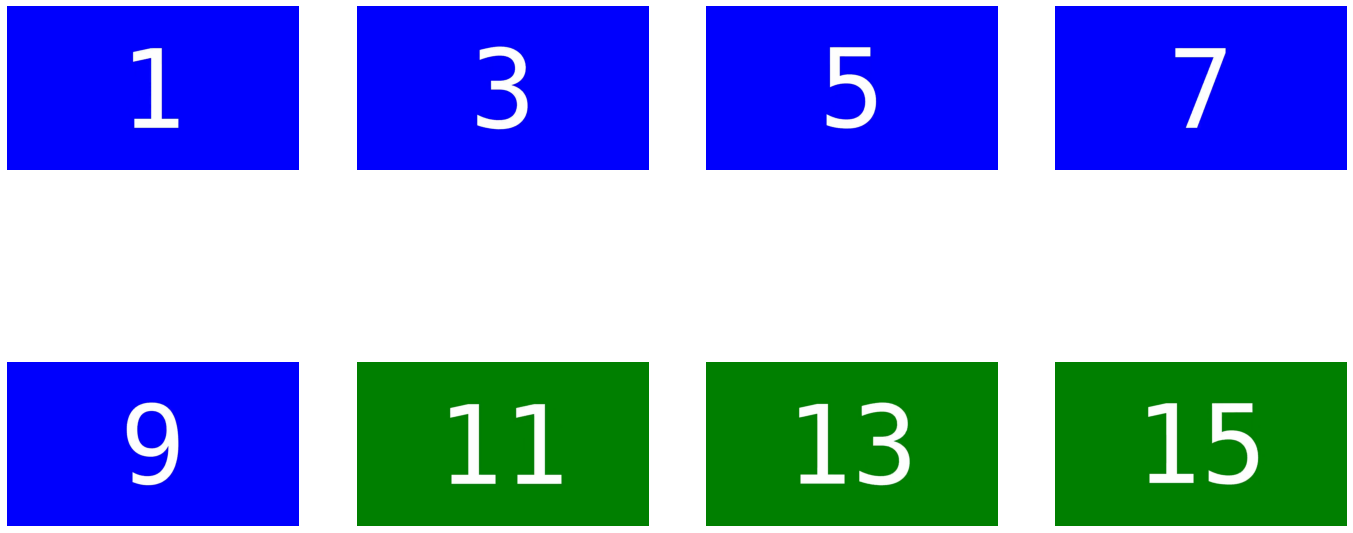

In [19]:
show_images(videos[0].as_cpu().at(1))

## Audio decoding

In [20]:
audio_dir = '/home/awolant/Projects/PyGeekly/data/audio'

In [22]:
@pipeline_def
def audio_pipeline():
    encoded, _ = fn.readers.file(file_root=audio_dir)
    audio, sr = fn.decoders.audio(encoded)
    return audio, sr

In [23]:
pipeline = audio_pipeline(batch_size=2, num_threads=1, device_id=0)

In [24]:
pipeline.build()

In [25]:
audio_data, sampling_rate = pipeline.run()

In [26]:
print("Sampling rate:", sampling_rate.at(0), "[Hz]")


Sampling rate: 16000.0 [Hz]


Visualize audio sample

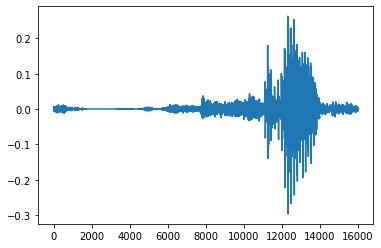

In [27]:
audio_data = audio_data.at(0).flatten()
plt.plot(audio_data)
plt.show()